## Import Resources

In [1]:
# The new version of dataset is only available in the tfds-nightly package.
%pip --no-cache-dir install tensorflow-datasets --user
%pip --no-cache-dir install tfds-nightly --user
# DON'T MISS TO RESTART THE KERNEL


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for tfds-nightly from https://files.pythonhosted.org/packages/42/7d/2d1c912540034944245b3d9e6e3989c26c2bd40ed5b0de8bea4715f9bd62/tfds_nightly-4.9.9.dev202507070045-py3-none-any.whl.metadata
  Obtaining dependency information for etils[edc,enp,epath,epy,etree]>=1.9.1 from https://files.pythonhosted.org/packages/dd/71/40ee142e564b8a34a7ae9546e99e665e0001011a3254d5bbbe113d72ccba/etils-1.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for immutabledict from https://files.pythonhosted.org/packages/59/56/25ca7b848164b7d93dbd5fc97dd7751700c93e324fe854afbeb562ee2f98/immutabledict-4.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyarrow from https://files.pythonhosted.org/packages/46/1f/7f02009bc7fc8955c391defee5348f510e589a020e4b40ca

  Obtaining dependency information for docstring-parser<1.0,>=0.15 from https://files.pythonhosted.org/packages/d5/7c/e9fcff7623954d86bdc17782036cbf715ecab1bec4847c008557affe1ca8/docstring_parser-0.16-py3-none-any.whl.metadata
INFO: pip is looking at multiple versions of etils[epath] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 57.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 287.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 kB 256.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 269.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 298.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pyth

In [2]:
# Import TensorFlow 
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

2025-07-07 12:44:21.011782: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-07 12:44:21.011842: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-07 12:44:21.011974: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# TODO: Make all other necessary imports.
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
import tensorflow_hub as hub

from tensorflow.keras import layers

# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

In [5]:

import json
import time

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [6]:
# Download data to default local directory "~/tensorflow_datasets"
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums=True --datasets=oxford_flowers102

# TODO: Load the dataset with TensorFlow Datasets. Hint: use tfds.load()
ds = tfds.load("oxford_flowers102",with_info=True,as_supervised = True)

2025-07-07 12:44:25.980295: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-07 12:44:25.980356: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-07 12:44:25.980402: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/student/.local/lib/python3.11/site-packages/tensorflow_datasets/scripts/download_and_prepare.py", line 25, in <module>
    from tensorflow_datasets.scripts.cli import main as main_cli
  File "/home/student/.l

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:02<?, ? url/s]
Dl Size...: 0 MiB [00:02, ? MiB/s]

Dl Completed...:  33%|███▎      | 1/3 [00:02<00:04,  2.09s/ url]
Dl Size...: 0 MiB [00:02, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Extraction completed...: 0 file [00:02, ? file/s]
Dl Size...:   0%|          | 1/328 [00:02<15:40,  2.87s/ MiB]

Dl Size...:   1%|          | 2/328 [00:02<15:37,  2.87s/ MiB]

Dl Size...:   1%|          | 3/328 [00:03<15:34,  2.87s/ MiB]

Dl Size...:   1%|          | 4/328 [00:03<15:31

Dl Size...:  16%|█▋        | 54/328 [00:05<00:22, 12.23 MiB/s]

Dl Size...:  17%|█▋        | 55/328 [00:05<00:22, 12.23 MiB/s]

Dl Size...:  17%|█▋        | 56/328 [00:05<00:22, 12.23 MiB/s]

Dl Size...:  17%|█▋        | 57/328 [00:05<00:22, 12.23 MiB/s]

Dl Size...:  18%|█▊        | 58/328 [00:05<00:22, 12.23 MiB/s]

Dl Size...:  18%|█▊        | 59/328 [00:05<00:22, 12.23 MiB/s]

Dl Size...:  18%|█▊        | 60/328 [00:05<00:21, 12.23 MiB/s]

Dl Size...:  19%|█▊        | 61/328 [00:05<00:21, 12.23 MiB/s]

Dl Size...:  19%|█▉        | 62/328 [00:05<00:21, 12.23 MiB/s]

Dl Size...:  19%|█▉        | 63/328 [00:05<00:21, 12.23 MiB/s]

Dl Size...:  20%|█▉        | 64/328 [00:05<00:21, 12.23 MiB/s]

Dl Size...:  20%|█▉        | 65/328 [00:05<00:21, 12.23 MiB/s]

Dl Size...:  20%|██        | 66/328 [00:05<00:21, 12.23 MiB/s]

Dl Size...:  20%|██        | 67/328 [00:05<00:21, 12.23 MiB/s]

Dl Size...:  21%|██        | 68/328 [00:05<00:21, 12.23 MiB/s]

Dl Size...:  21%|██        | 69/328 [00:

Dl Size...:  35%|███▌      | 115/328 [00:07<00:10, 19.91 MiB/s]

Dl Size...:  35%|███▌      | 116/328 [00:07<00:10, 19.91 MiB/s]

Dl Size...:  36%|███▌      | 117/328 [00:07<00:10, 19.91 MiB/s]

Dl Size...:  36%|███▌      | 118/328 [00:07<00:10, 19.91 MiB/s]

Dl Size...:  36%|███▋      | 119/328 [00:07<00:10, 19.91 MiB/s]

Dl Size...:  37%|███▋      | 120/328 [00:07<00:10, 19.91 MiB/s]

Dl Size...:  37%|███▋      | 121/328 [00:07<00:10, 19.91 MiB/s]

Dl Size...:  37%|███▋      | 122/328 [00:07<00:10, 19.91 MiB/s]

Dl Size...:  38%|███▊      | 123/328 [00:07<00:10, 19.91 MiB/s]

Dl Size...:  38%|███▊      | 124/328 [00:07<00:10, 19.91 MiB/s]

Dl Size...:  38%|███▊      | 125/328 [00:07<00:10, 19.91 MiB/s]

Dl Size...:  38%|███▊      | 126/328 [00:08<00:10, 19.91 MiB/s]

Dl Size...:  39%|███▊      | 127/328 [00:08<00:10, 19.91 MiB/s]

Extraction completed...: 0 file [00:08, ? file/s]
Dl Size...:  39%|███▉      | 128/328 [00:08<00:09, 21.98 MiB/s]

Dl Size...:  39%|███▉      | 129/328 [00

Dl Size...:  54%|█████▎    | 176/328 [00:09<00:06, 23.65 MiB/s]

Dl Size...:  54%|█████▍    | 177/328 [00:09<00:06, 23.65 MiB/s]

Dl Size...:  54%|█████▍    | 178/328 [00:10<00:06, 23.65 MiB/s]

Dl Size...:  55%|█████▍    | 179/328 [00:10<00:06, 23.65 MiB/s]

Dl Size...:  55%|█████▍    | 180/328 [00:10<00:06, 23.65 MiB/s]

Dl Size...:  55%|█████▌    | 181/328 [00:10<00:06, 23.65 MiB/s]

Extraction completed...: 0 file [00:10, ? file/s]
Dl Size...:  55%|█████▌    | 182/328 [00:10<00:06, 24.10 MiB/s]

Dl Size...:  56%|█████▌    | 183/328 [00:10<00:06, 24.10 MiB/s]

Dl Size...:  56%|█████▌    | 184/328 [00:10<00:05, 24.10 MiB/s]

Dl Size...:  56%|█████▋    | 185/328 [00:10<00:05, 24.10 MiB/s]

Dl Size...:  57%|█████▋    | 186/328 [00:10<00:05, 24.10 MiB/s]

Dl Size...:  57%|█████▋    | 187/328 [00:10<00:05, 24.10 MiB/s]

Dl Size...:  57%|█████▋    | 188/328 [00:10<00:05, 24.10 MiB/s]

Dl Size...:  58%|█████▊    | 189/328 [00:10<00:05, 24.10 MiB/s]

Dl Size...:  58%|█████▊    | 190/328 [00

Dl Size...:  72%|███████▏  | 236/328 [00:12<00:03, 24.95 MiB/s]

Extraction completed...: 0 file [00:12, ? file/s]
Dl Size...:  72%|███████▏  | 237/328 [00:12<00:03, 25.53 MiB/s]

Dl Size...:  73%|███████▎  | 238/328 [00:12<00:03, 25.53 MiB/s]

Dl Size...:  73%|███████▎  | 239/328 [00:12<00:03, 25.53 MiB/s]

Dl Size...:  73%|███████▎  | 240/328 [00:12<00:03, 25.53 MiB/s]

Dl Size...:  73%|███████▎  | 241/328 [00:12<00:03, 25.53 MiB/s]

Dl Size...:  74%|███████▍  | 242/328 [00:12<00:03, 25.53 MiB/s]

Dl Size...:  74%|███████▍  | 243/328 [00:12<00:03, 25.53 MiB/s]

Dl Size...:  74%|███████▍  | 244/328 [00:12<00:03, 25.53 MiB/s]

Dl Size...:  75%|███████▍  | 245/328 [00:12<00:03, 25.53 MiB/s]

Dl Size...:  75%|███████▌  | 246/328 [00:12<00:03, 25.53 MiB/s]

Dl Size...:  75%|███████▌  | 247/328 [00:12<00:03, 25.53 MiB/s]

Dl Size...:  76%|███████▌  | 248/328 [00:12<00:03, 25.53 MiB/s]

Dl Size...:  76%|███████▌  | 249/328 [00:12<00:03, 25.53 MiB/s]

Dl Size...:  76%|███████▌  | 250/328 [00

Dl Size...:  90%|█████████ | 296/328 [00:14<00:01, 26.06 MiB/s]

Dl Size...:  91%|█████████ | 297/328 [00:14<00:01, 26.06 MiB/s]

Dl Size...:  91%|█████████ | 298/328 [00:14<00:01, 26.06 MiB/s]

Dl Size...:  91%|█████████ | 299/328 [00:14<00:01, 26.06 MiB/s]

Dl Size...:  91%|█████████▏| 300/328 [00:14<00:01, 26.06 MiB/s]

Dl Size...:  92%|█████████▏| 301/328 [00:14<00:01, 26.06 MiB/s]

Dl Size...:  92%|█████████▏| 302/328 [00:14<00:00, 26.06 MiB/s]

Dl Size...:  92%|█████████▏| 303/328 [00:14<00:00, 26.06 MiB/s]

Dl Size...:  93%|█████████▎| 304/328 [00:14<00:00, 26.06 MiB/s]

Dl Size...:  93%|█████████▎| 305/328 [00:14<00:00, 26.06 MiB/s]

Dl Size...:  93%|█████████▎| 306/328 [00:14<00:00, 26.06 MiB/s]

Dl Size...:  94%|█████████▎| 307/328 [00:14<00:00, 26.06 MiB/s]

Dl Size...:  94%|█████████▍| 308/328 [00:14<00:00, 26.06 MiB/s]

Dl Size...:  94%|█████████▍| 309/328 [00:14<00:00, 26.06 MiB/s]

Dl Size...:  95%|█████████▍| 310/328 [00:14<00:00, 26.06 MiB/s]

Dl Size...:  95%|████████

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Extraction completed...:   0%|          | 0/8189 [01:31<?, ? file/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 26.49 MiB/s]

Dl Size...: 100%|███

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Extraction completed...:  13%|█▎        | 1065/8189 [01:38<03:39, 32.43 file/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Extraction completed...:  15%|█▍        | 1220/8189 [01:39<02:38, 43.86 file/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Extraction completed...:  37%|███▋      | 3056/8189 [01:51<00:34, 148.19 file/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 26.49 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Extraction completed...:  39%|███▉      | 3206/8189 [01:52<00:34, 146.07 file/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 26.49 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:54<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Extraction completed...:  52%|█████▏    | 4263/8189 [02:00<00:29, 133.33 file/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Extraction completed...:  84%|████████▍ | 6860/8189 [02:17<00:08, 153.76 file/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 26.49 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:19<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:25<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:26<00:00, 26.49 MiB/s]

Dl Size...: 100%|████████

Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteACAJCE/oxford_flowers102-train.tfrecord*...:   0%|          | 0/1020 [00:00<?, ? examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteACAJCE/oxford_flowers102-train.tfrecord*...:  87%|████████▋ | 886/1020 [00:00<00:00, 8856.48 examples/s]
Generating test examples...:  92%|█████████▏| 5666/6149 [00:03<00:00, 1837.58 examples/s]
                                                                                         
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteACAJCE/oxford_flowers102-test.tfrecord*...:   0%|          | 0/6149 [00:00<?, ? examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteACAJCE/oxford_flowers102-test.tfrecord*...:  15%|█▍        | 892/6149 [00:00<00:00, 8913.04 examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteACAJCE/oxford_flowers102-test.tfreco

Dataset oxford_flowers102 downloaded and prepared to /home/student/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


In [7]:
dataset,info = ds

In [8]:
# TODO: Create a training set, a validation set and a test set.
training_set = dataset['train']
testing_set = dataset['test']
validation_set = dataset['validation']

## Explore the Dataset

In [9]:
info

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

In [10]:
info.splits

{Split('train'): <SplitInfo num_examples=1020, num_shards=1>,
 Split('test'): <SplitInfo num_examples=6149, num_shards=2>,
 Split('validation'): <SplitInfo num_examples=1020, num_shards=1>}

In [11]:
# TODO: Get the number of examples in each set from the dataset info.

num_tests = info.splits['test'].num_examples
num_train = info.splits['train'].num_examples
num_validation = info.splits['validation'].num_examples
print("train examples: {}, test examples: {}, validation examples: {}".format(num_train,num_tests,num_validation))

# TODO: Get the number of classes in the dataset from the dataset info.

num_classes = info.features['label'].num_classes
print("Num of classes:", num_classes)

train examples: 1020, test examples: 6149, validation examples: 1020
Num of classes: 102


In [12]:
# TODO: Print the shape and corresponding label of 3 images in the training set.

for image,label in training_set.take(3):
    print("Image shape:" ,image.numpy().shape)
    print('label:' ,label.numpy())

Image shape: (500, 667, 3)
label: 72
Image shape: (500, 666, 3)
label: 84
Image shape: (670, 500, 3)
label: 70


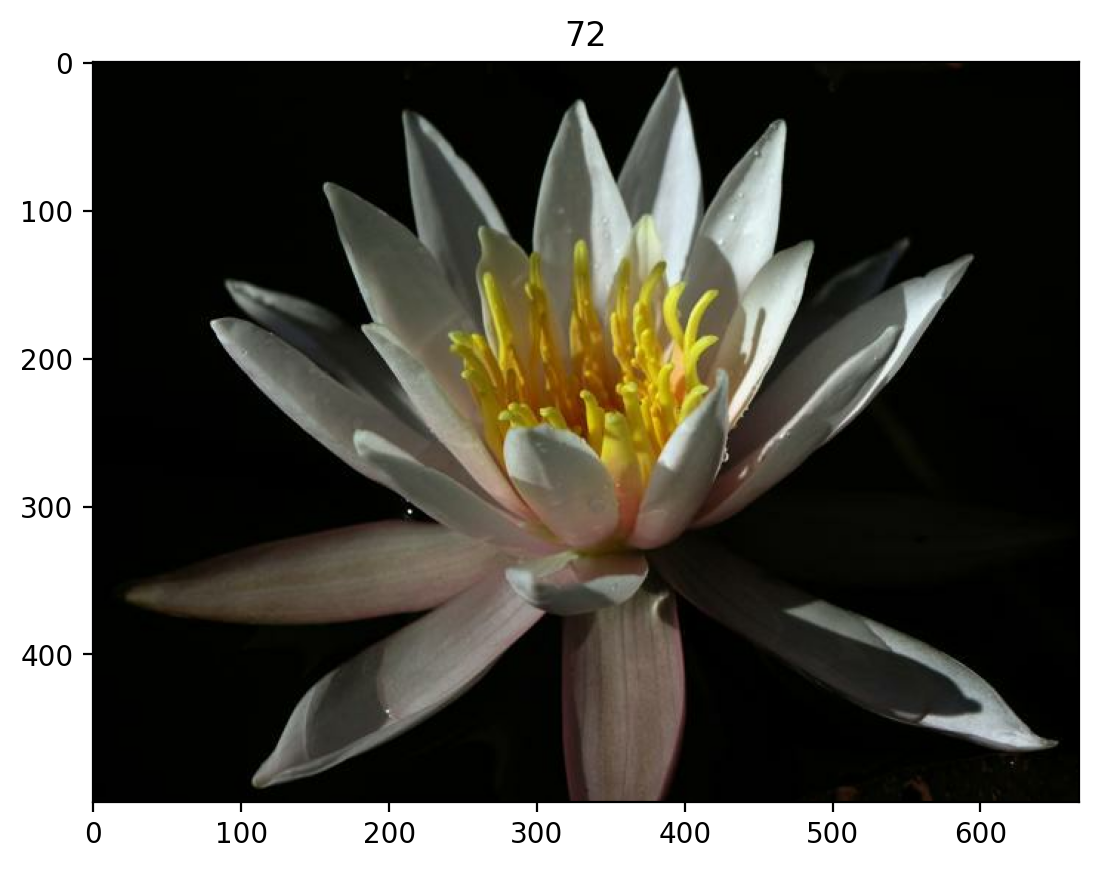

In [13]:
# TODO: Plot 1 image from the training set. 

for image,label in training_set.take(1):
    image = image.numpy()
    label = label.numpy()

# Set the title of the plot to the corresponding image label. 

plt.imshow(image);
plt.title(label);

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [14]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)
    
len(class_names)

102

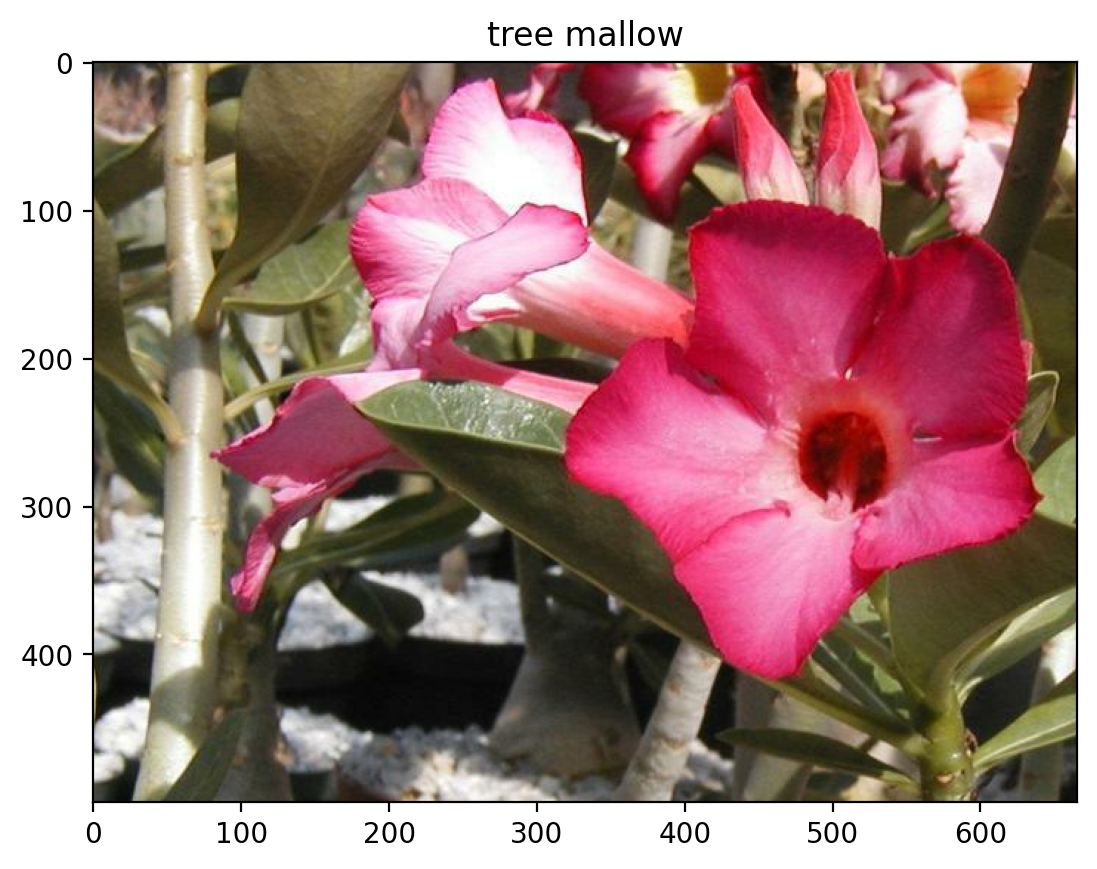

In [15]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 

for image,label in training_set.take(2):
    image = image.numpy()
    label = label.numpy()
    

plt.imshow(image);
plt.title(class_names[str(label+1)]);

## Create Pipeline

In [16]:
# TODO: Create a pipeline for each set.

batch_size = 64
image_dim = 224

def format_image(image,label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image,(image_dim,image_dim))
    image /= 255;
    return image,label

training_batches = training_set.shuffle(num_train).map(format_image).batch(batch_size).prefetch(1)
testing_batches = testing_set.map(format_image).batch(batch_size).prefetch(1)
validation_batches = validation_set.map(format_image).batch(batch_size).prefetch(1)

(224, 224, 3)


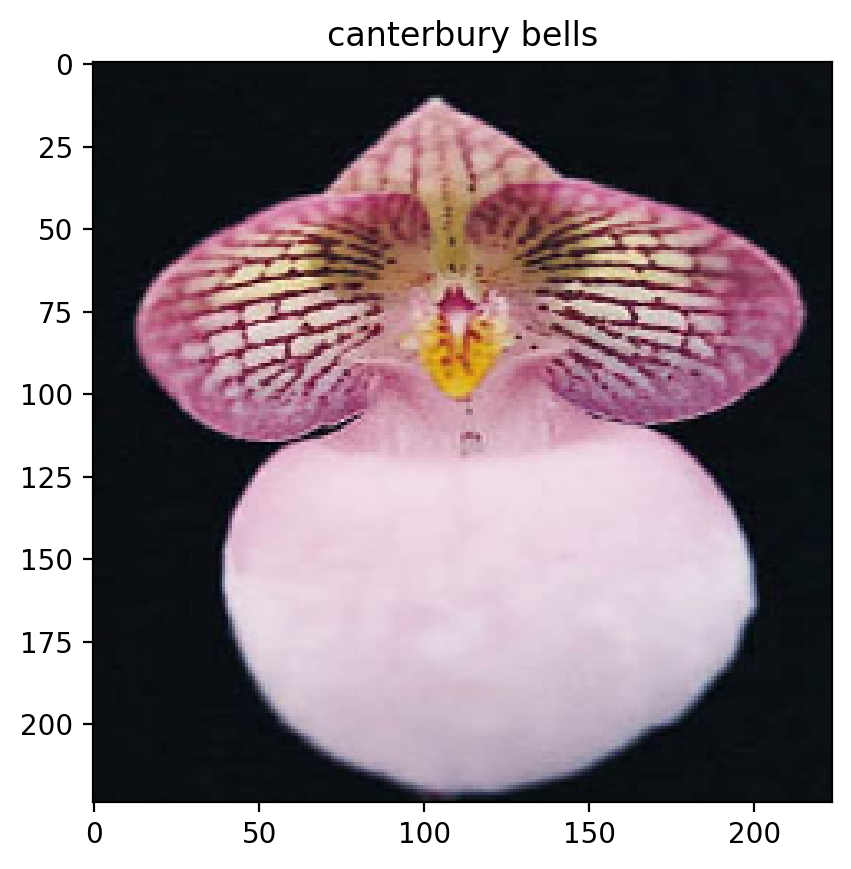

In [17]:
for image,label in training_batches.take(1):
    image = image.numpy()
    image = image[0]
    label = label.numpy()[0]
    
print(image.shape)
plt.imshow(image);
plt.title(class_names[str(label+1)]);

In [18]:
training_batches

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [19]:
# TODO: Build and train your network.

feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(image_dim,image_dim,3),trainable=False)

In [20]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.

model = tf.keras.Sequential([
  feature_extractor_layer,
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
  layers.Dense(num_classes,activation='softmax'),
])


model.build((None,224,224,3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 102)               13158     
                                                                 
Total params: 2631974 (10.04 MB)
Trainable params: 37399

In [21]:
print('Is there a GPU Available:', tf.test.is_gpu_available())

Is there a GPU Available: True


In [22]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
callbacks = [early_stop]
EPOCHS = 100

In [23]:
model.compile(optimizer='adam', metrics=['accuracy'],loss='sparse_categorical_crossentropy')

with tf.device('/GPU:0'):
    history = model.fit(training_batches,epochs=EPOCHS,validation_data=validation_batches,callbacks=callbacks)

Epoch 1/100
16/16 [==============================] - 28s 592ms/step - loss: 4.7752 - accuracy: 0.0167 - val_loss: 4.5316 - val_accuracy: 0.0618
Epoch 2/100
16/16 [==============================] - 11s 478ms/step - loss: 4.5208 - accuracy: 0.0343 - val_loss: 4.4159 - val_accuracy: 0.1069
Epoch 3/100
16/16 [==============================] - 11s 479ms/step - loss: 4.3769 - accuracy: 0.0510 - val_loss: 4.2441 - val_accuracy: 0.2049
Epoch 4/100
16/16 [==============================] - 10s 473ms/step - loss: 4.1841 - accuracy: 0.0912 - val_loss: 3.9409 - val_accuracy: 0.2833
Epoch 5/100
16/16 [==============================] - 10s 472ms/step - loss: 3.9127 - accuracy: 0.1275 - val_loss: 3.6407 - val_accuracy: 0.3363
Epoch 6/100
16/16 [==============================] - 10s 469ms/step - loss: 3.6463 - accuracy: 0.1598 - val_loss: 3.2397 - val_accuracy: 0.4186
Epoch 7/100
16/16 [==============================] - 10s 460ms/step - loss: 3.3902 - accuracy: 0.2069 - val_loss: 2.9557 - val_accuracy:

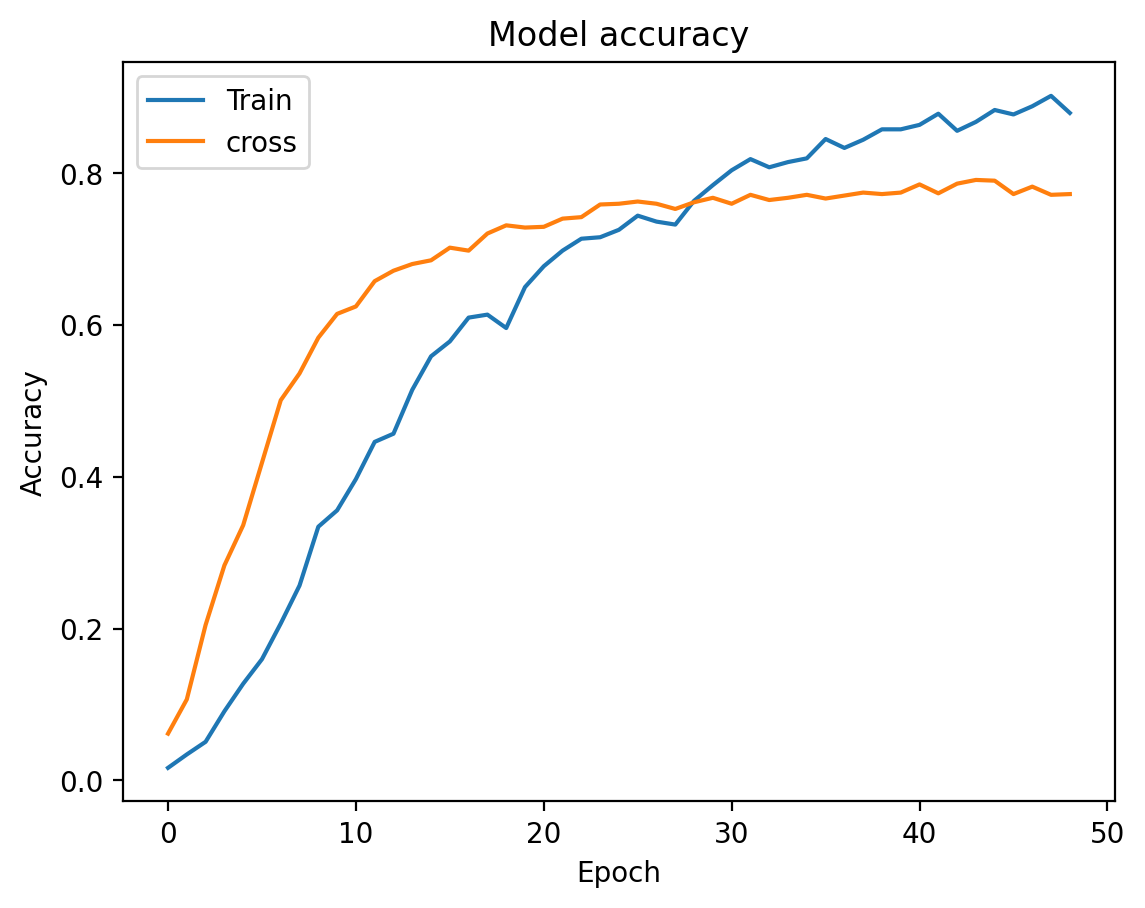

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'cross'], loc='upper left')
plt.show()

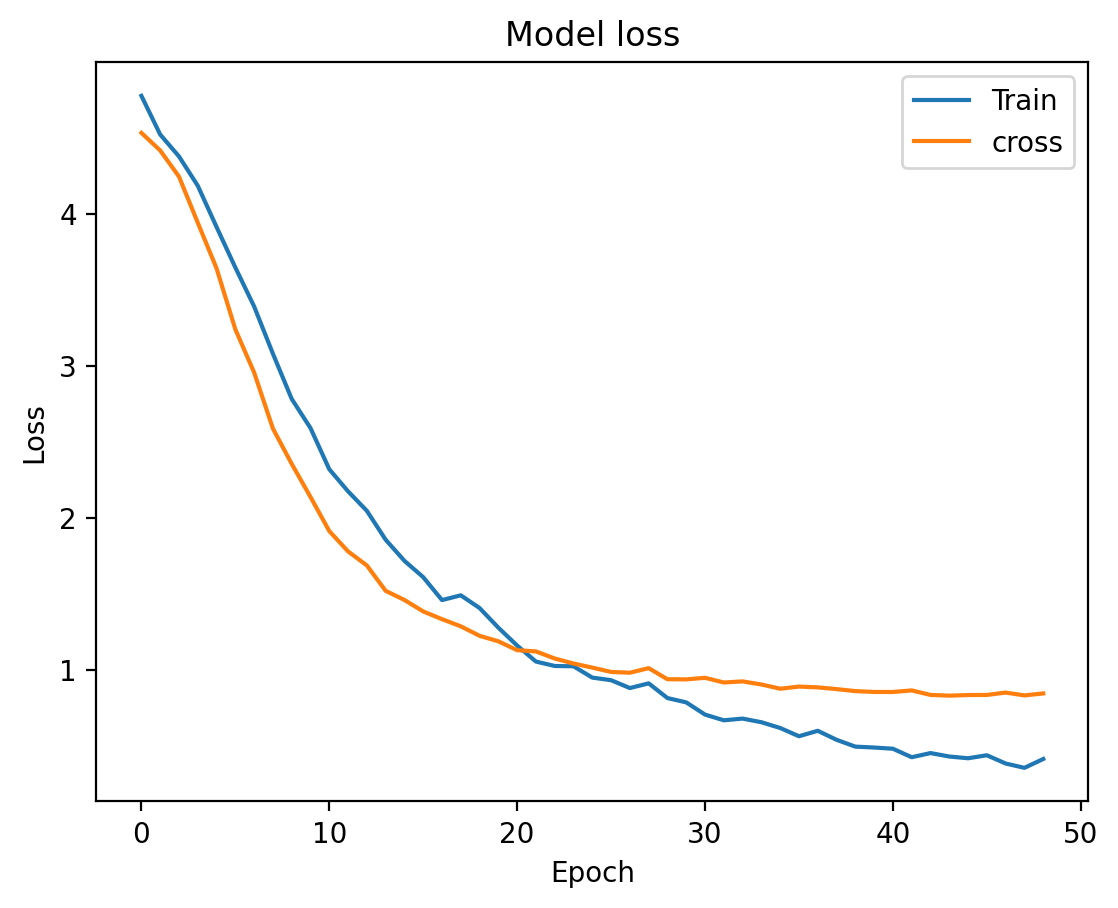

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'cross'], loc='upper right')
plt.show()

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [26]:
loss, accuracy = model.evaluate(testing_batches) 

97/97 [==============================] - 29s 292ms/step - loss: 0.9952 - accuracy: 0.7383


In [27]:
# TODO: Print the loss and accuracy values achieved on the entire test set.

print("Model loss on test data:" , loss),
print("Model accuracy on test data", accuracy)

Model loss on test data: 0.9951618313789368
Model accuracy on test data 0.7383314371109009


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [28]:
# TODO: Save your trained model as a Keras model.

model.save('./best_model')



## Load the Keras Model

Load the Keras model you saved above.

In [29]:
# TODO: Load the Keras model

loaded_model = tf.keras.models.load_model('./best_model', custom_objects={'KerasLayer': hub.KerasLayer})


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [30]:
# TODO: Create the process_image function

def process_image(image):
    image = tf.image.resize(image,(image_dim,image_dim))/255
    result_image = image.numpy()
    return result_image;

To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

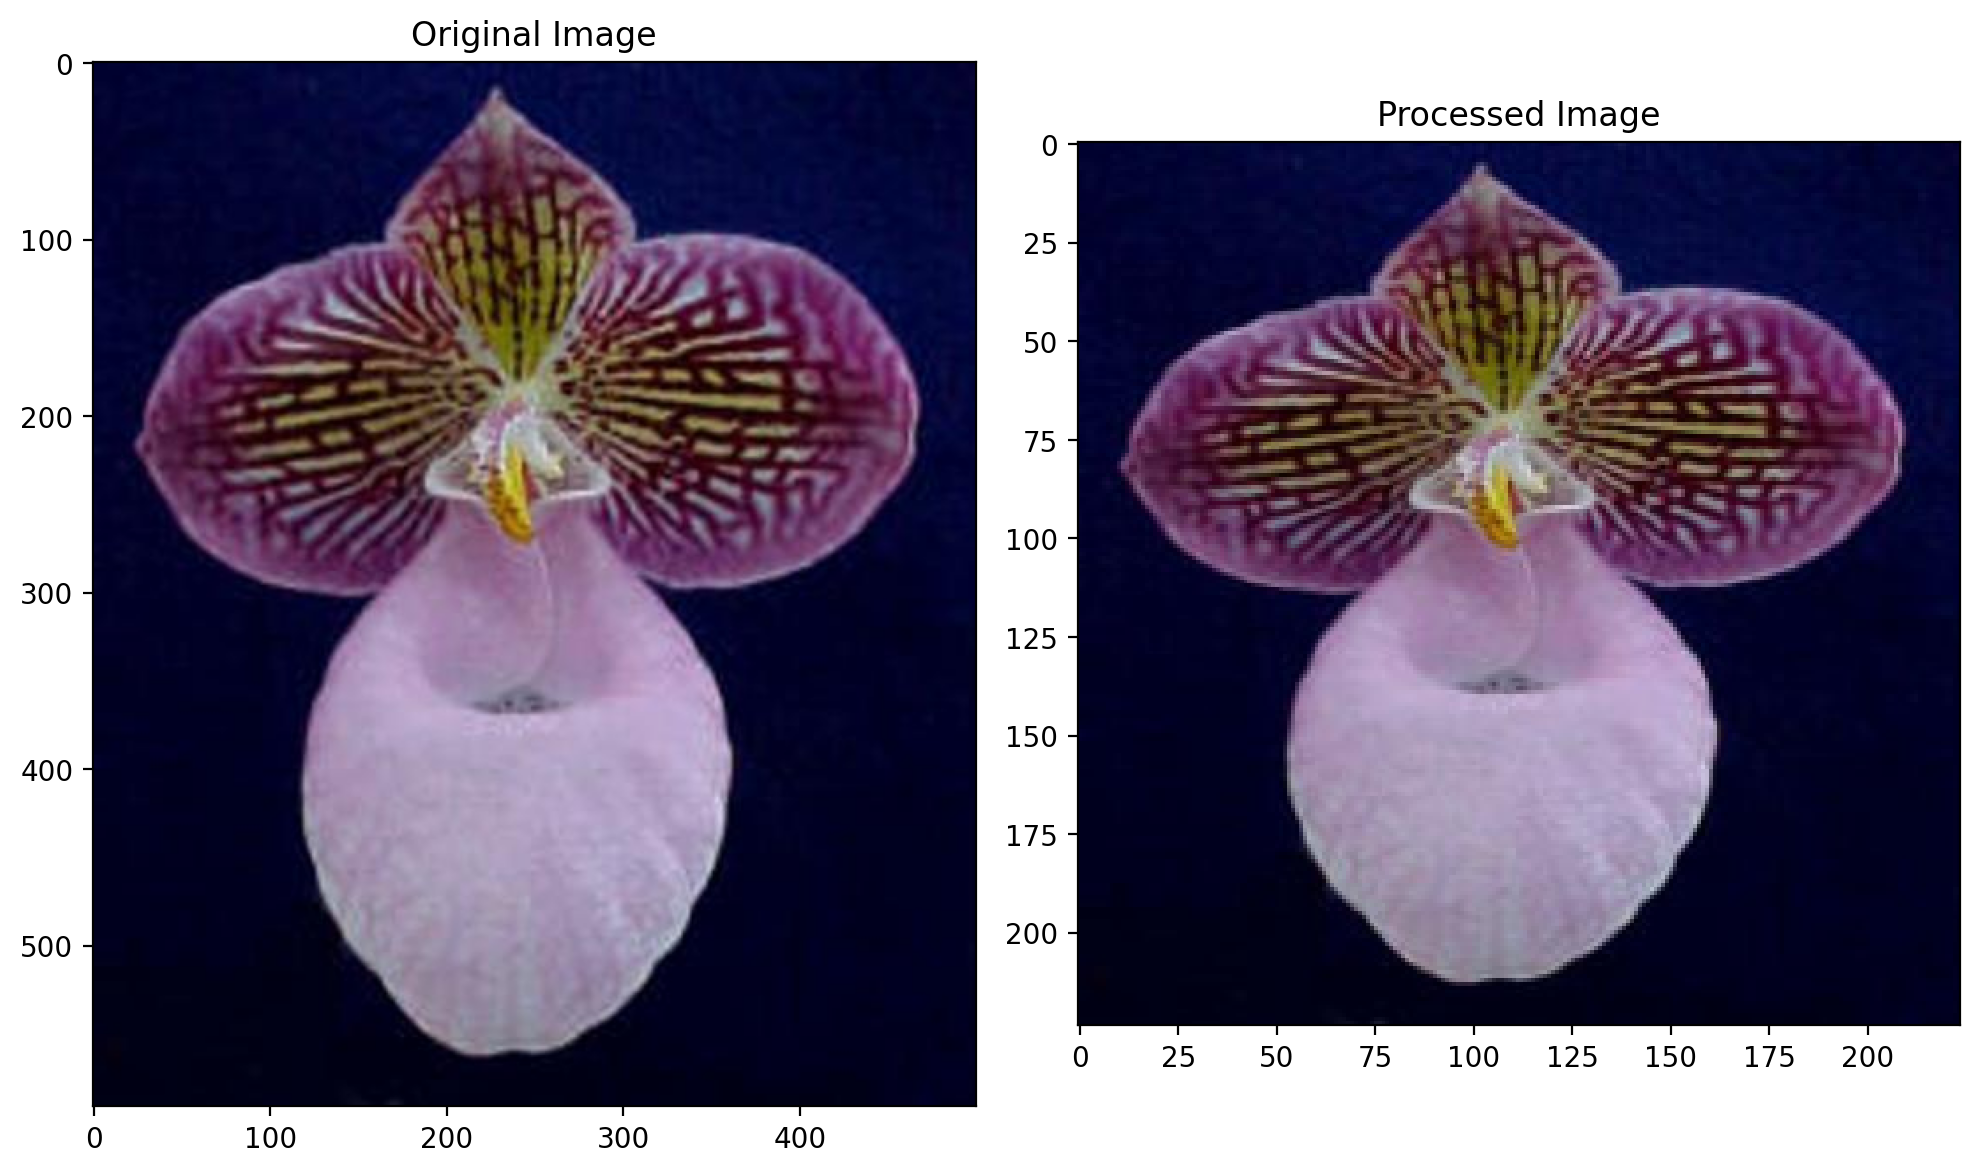

In [31]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

In [32]:
# TODO: Create the predict function

def predict(image_path,given_model,k):
    image_path = image_path
    im = Image.open(image_path)
    image = np.asarray(im)
    np.set_printoptions(precision=6) ## for better printing
    processed_image = process_image(image)
    processed_image = np.expand_dims(processed_image,axis=0);
    prop,index = tf.math.top_k(given_model.predict(processed_image),k)
    prop = prop.numpy()[0].tolist()
    index = [i + 1 for i in index.numpy()[0].tolist()]
    return prop,index

In [33]:
# TODO: Plot the input image along with the top 5 classes
images_path = ['./test_images/hard-leaved_pocket_orchid.jpg','./test_images/cautleya_spicata.jpg','./test_images/orange_dahlia.jpg','./test_images/wild_pansy.jpg']

1/1 [==============================] - 1s 1s/step


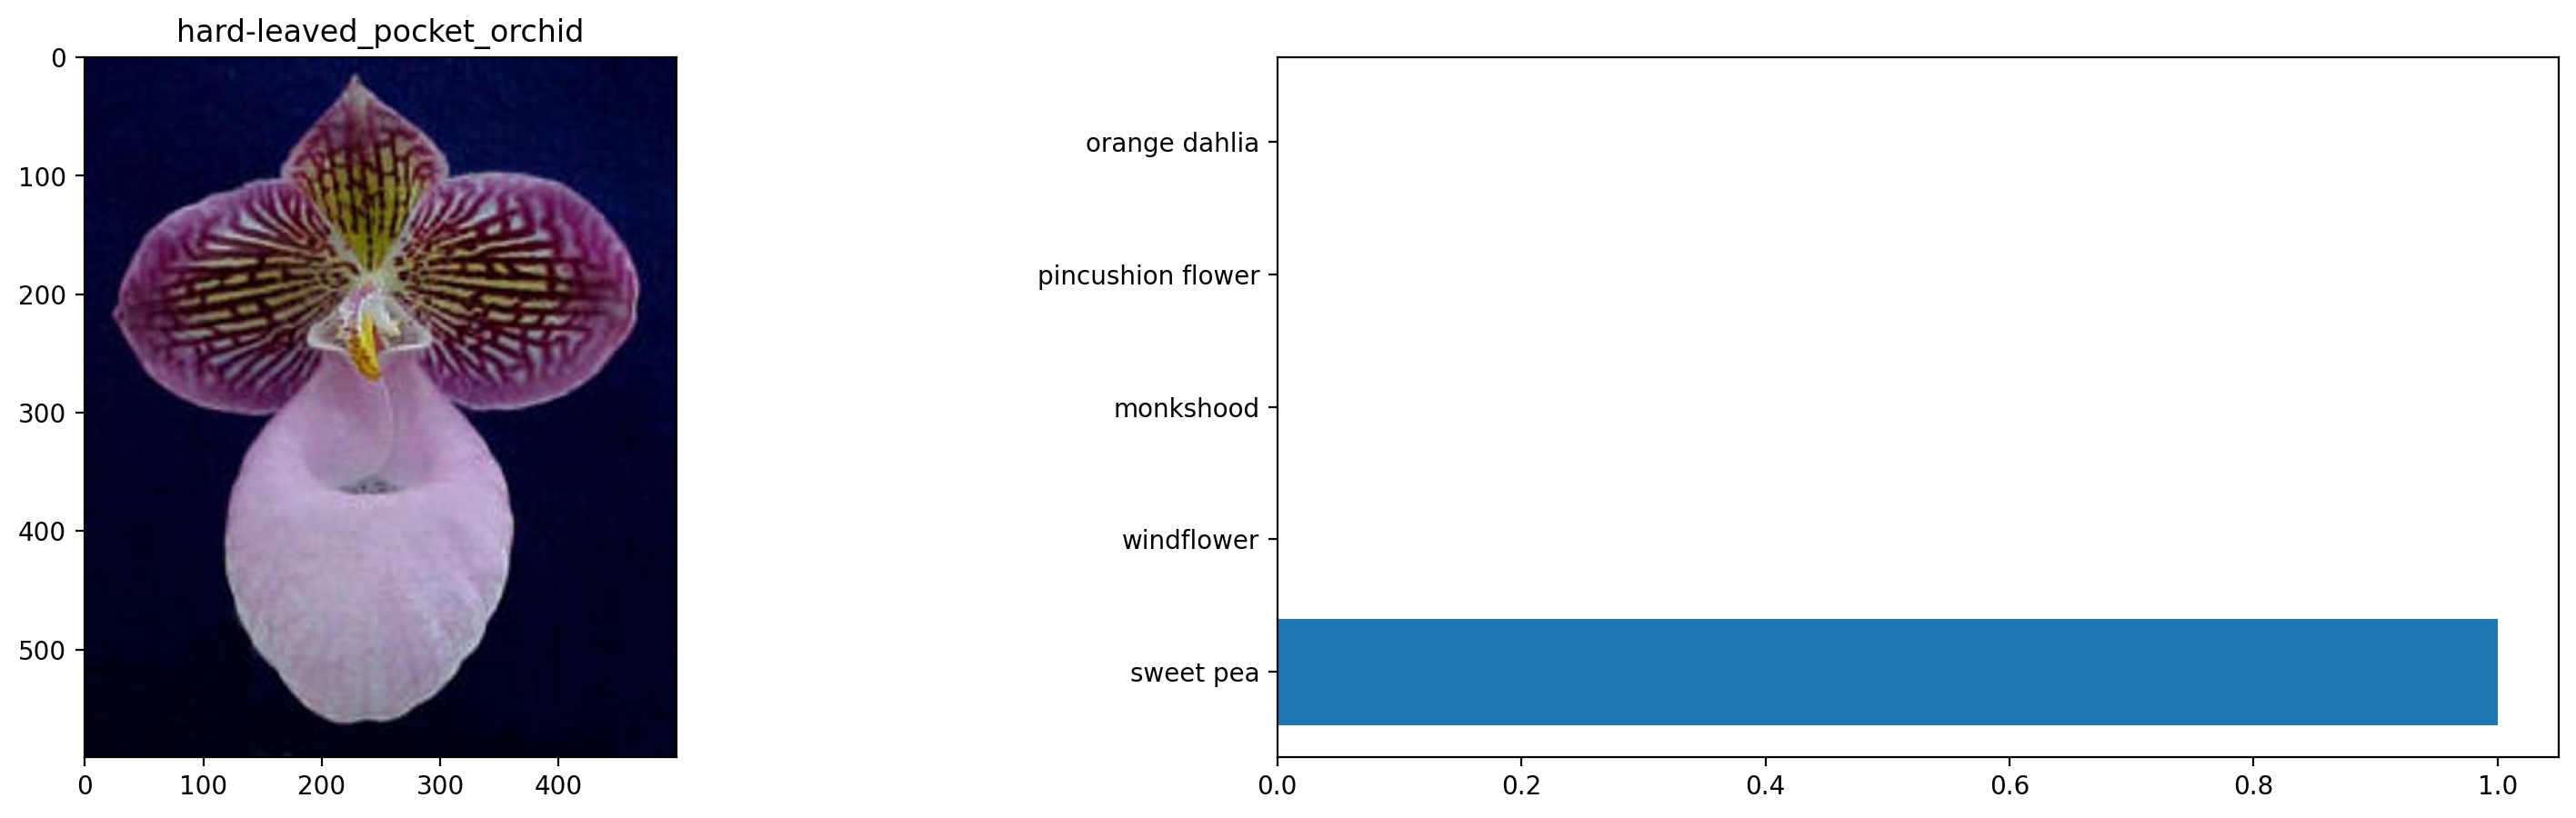

1/1 [==============================] - 0s 42ms/step


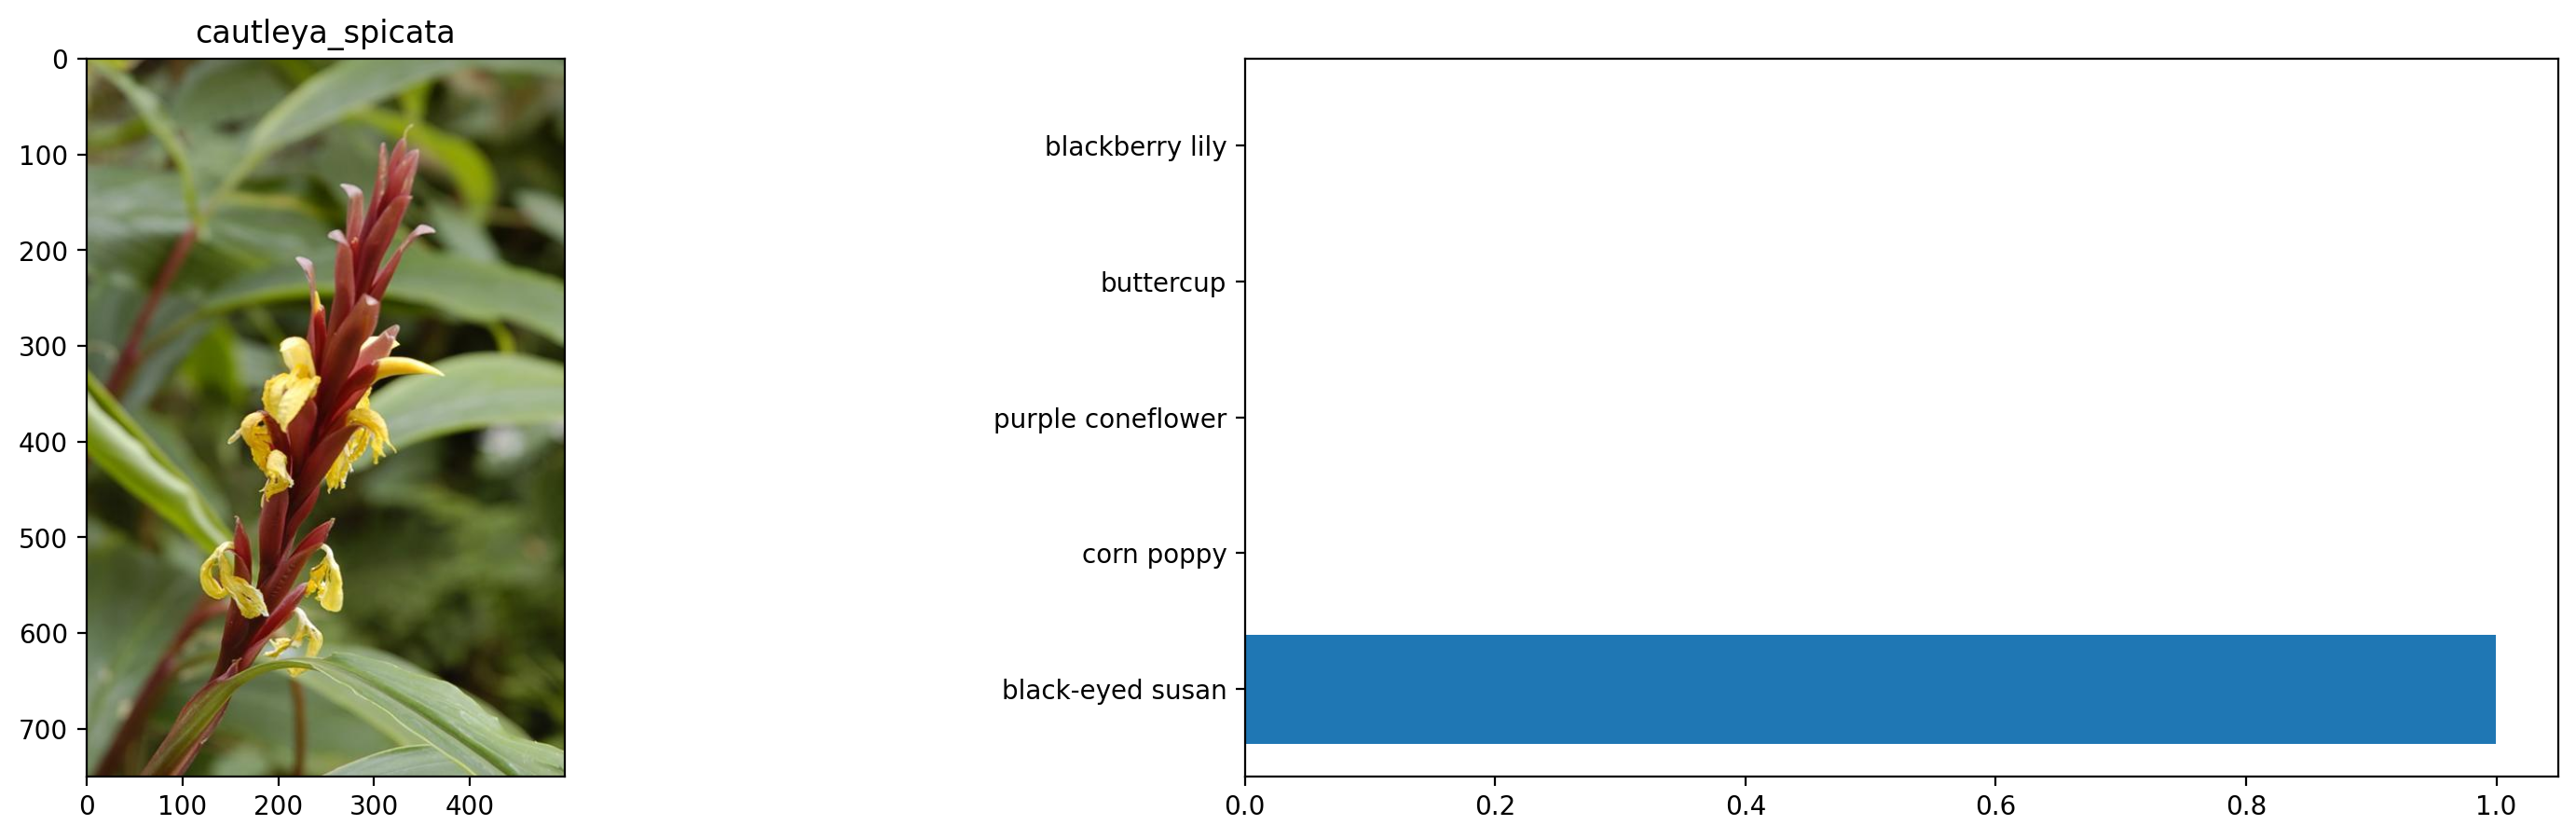

1/1 [==============================] - 0s 29ms/step


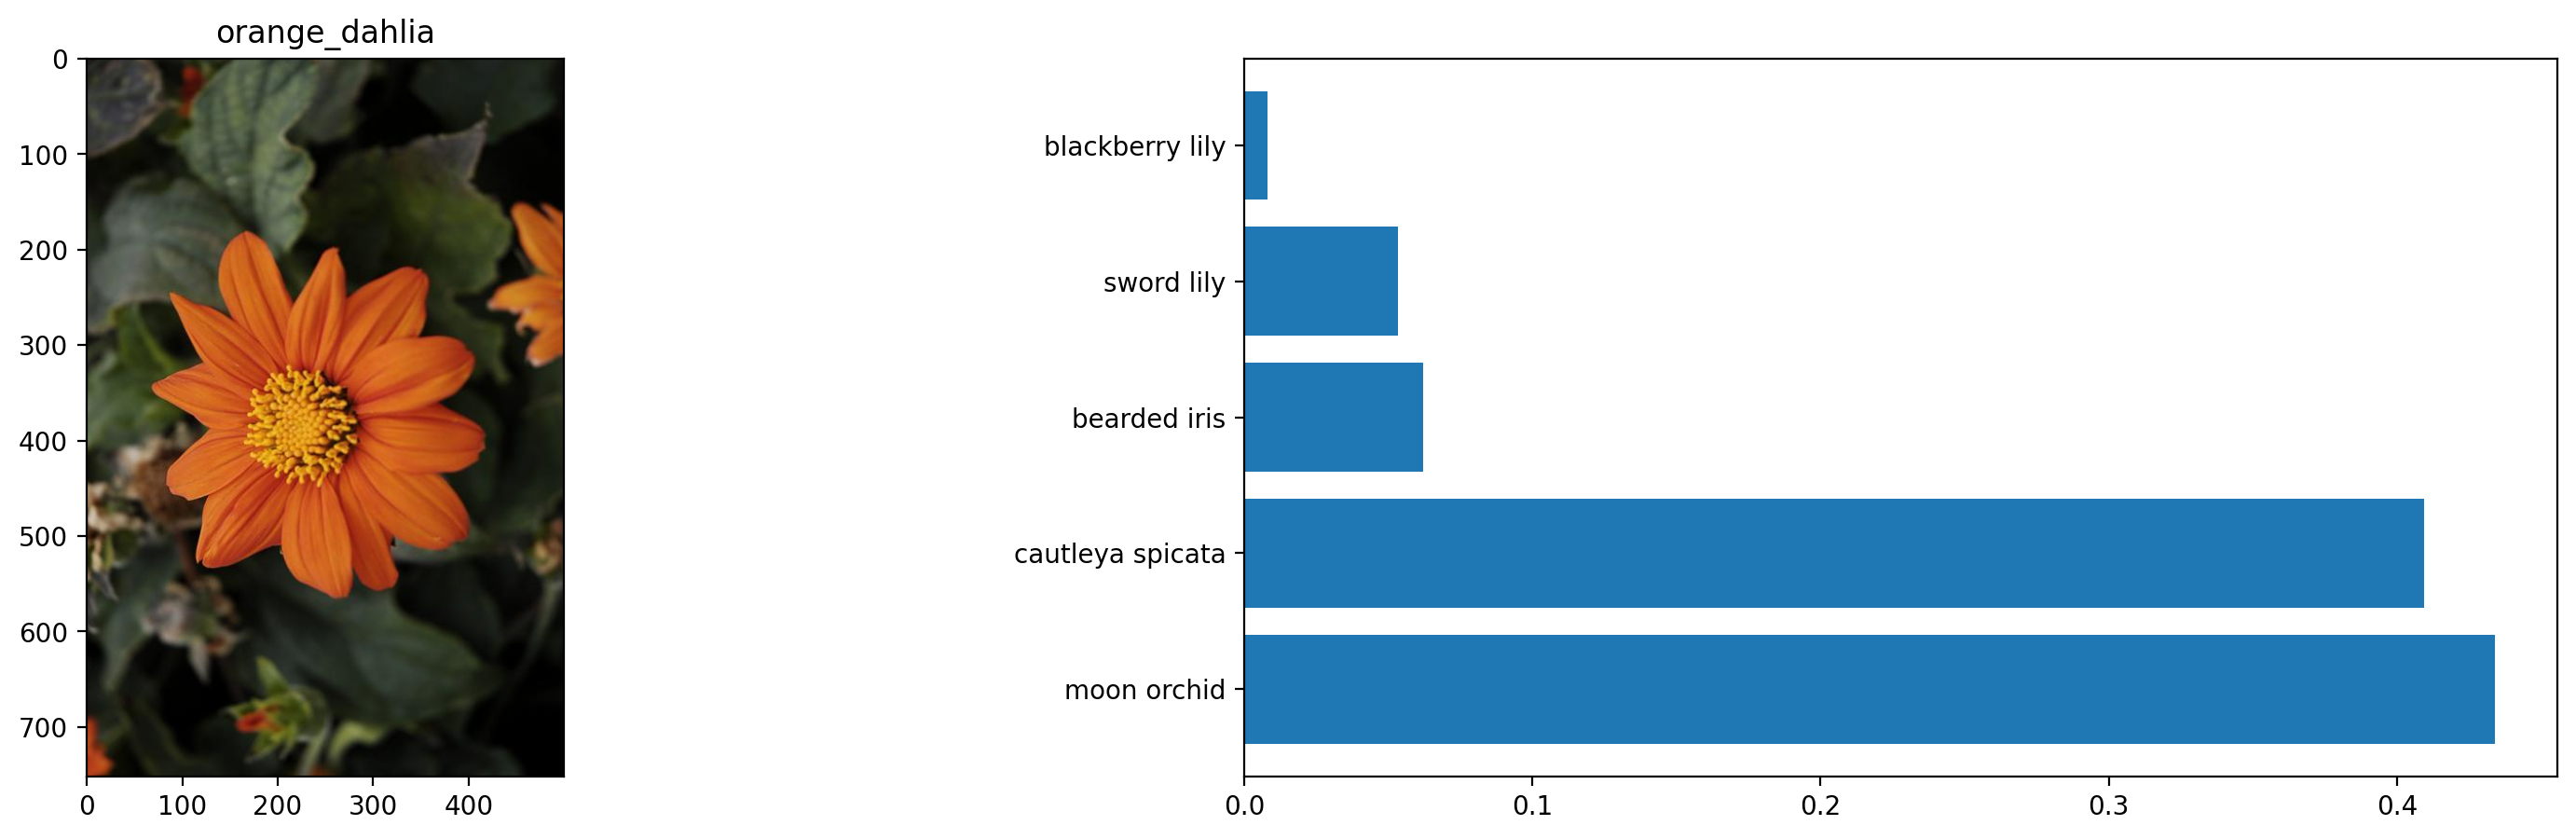

1/1 [==============================] - 0s 30ms/step


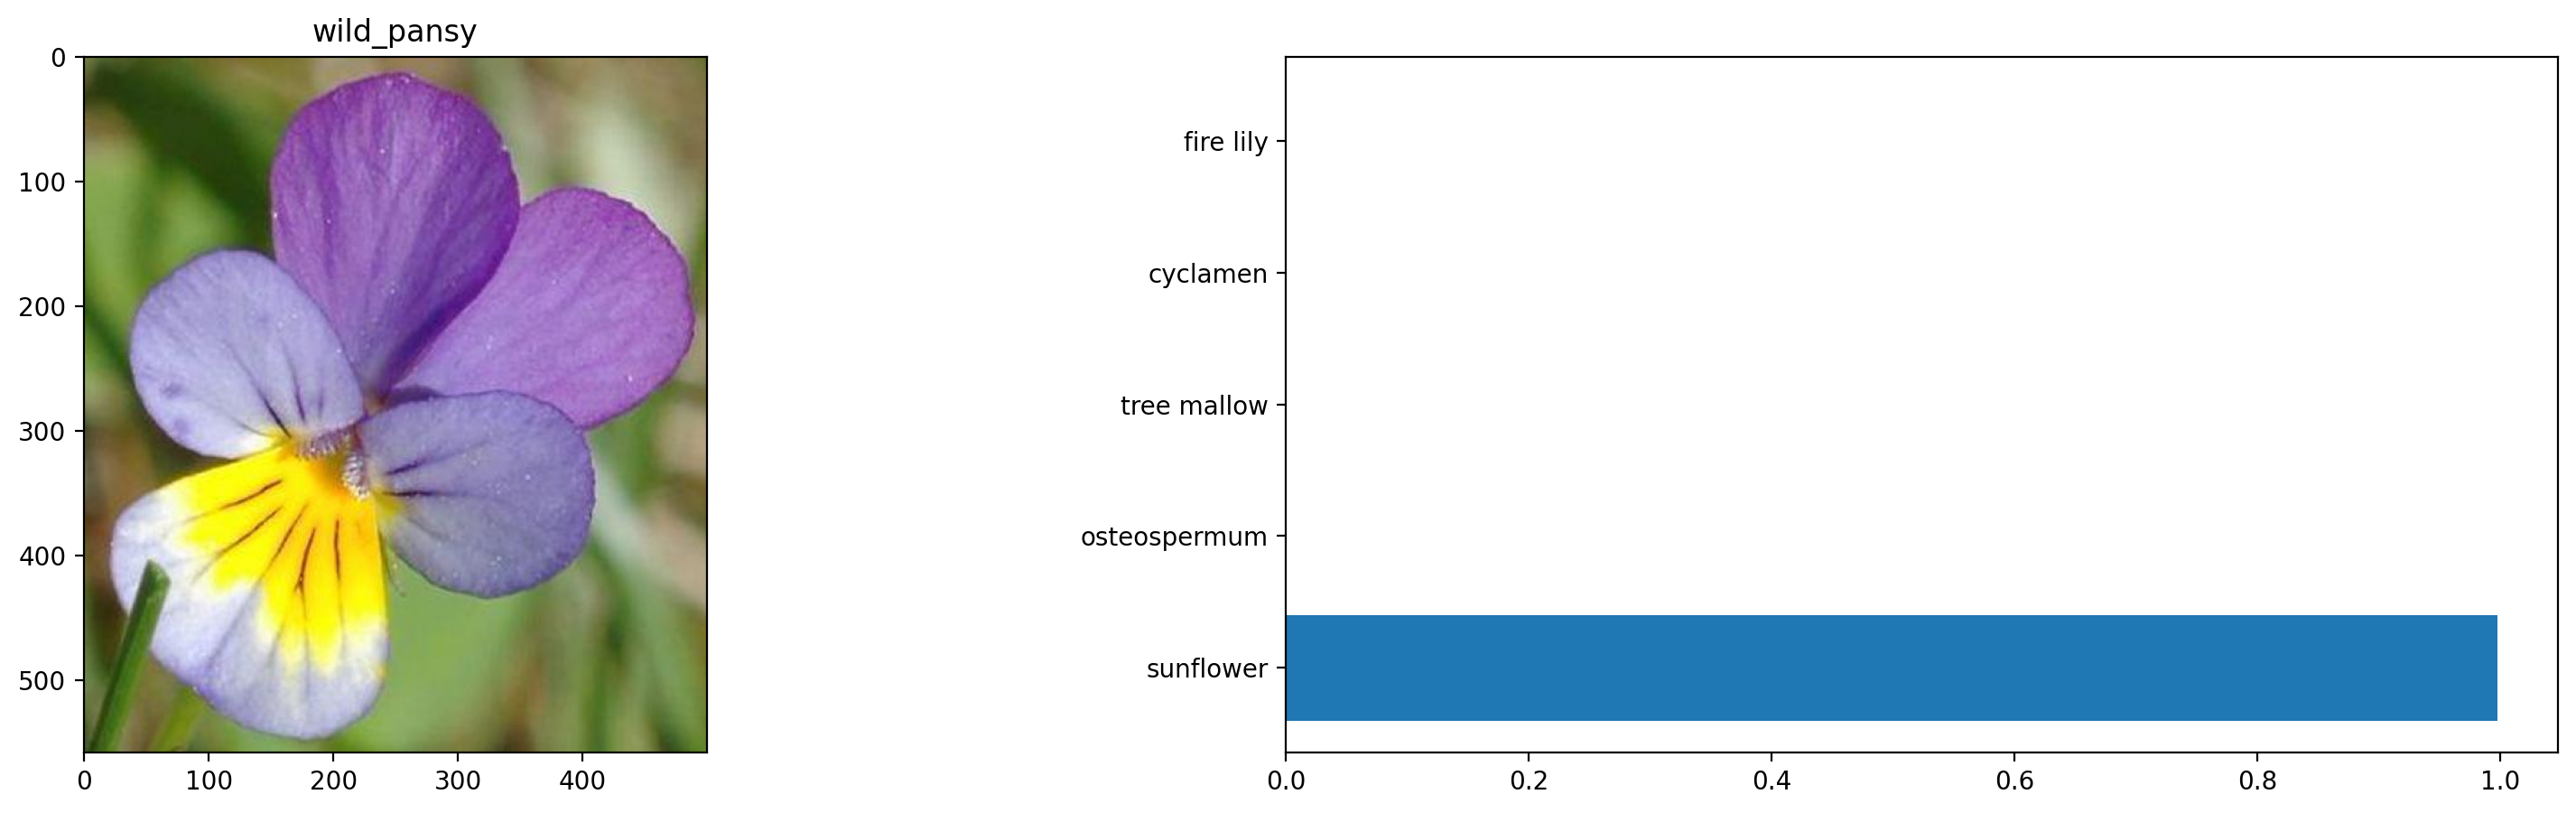

In [34]:
for path in images_path:
    
    prop,ind = predict(path,loaded_model,5)
    
    
    fig, (ax1, ax2) = plt.subplots(figsize=(20,5), ncols=2)
    im = Image.open(path)
    image = np.asarray(im) ## plotting the orignal image, but predicting on the processed image
    ax1.imshow(image)
    ax1.set_title(path[14:-4])
    
    y_pos = np.arange(len(ind))
    plt.barh(y_pos,prop)
    plt.yticks(y_pos,map(lambda x: class_names[str(x+1)],ind))
    plt.show()